# **Data Science Learners Hub**

**Module : SQL**

**Created Date** : 03 Dec 2023

**Topic :** Disabling and Enabling Constraints

**email** : datasciencelearnershub@gmail.com  
  
**Telegram** : [https://t.me/DataScienceLearnersHub](https://t.me/DataScienceLearnersHub)

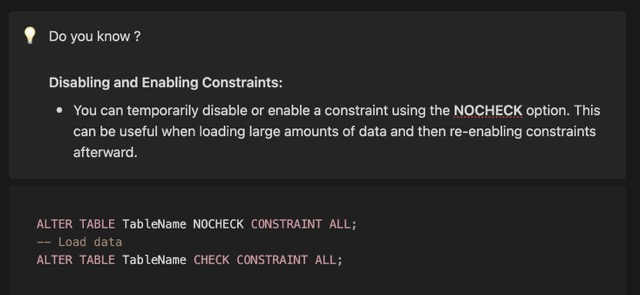

In [2]:
CREATE DATABASE DataScienceLearnersHub

Commands completed successfully.

Total execution time: 00:00:00.502

In [3]:
USE DataScienceLearnersHub

Commands completed successfully.

Total execution time: 00:00:00.008

In [4]:
CREATE TABLE TestConstraints(
    emp_id INT NOT NULL UNIQUE CHECK(emp_id > 100),
    emp_name CHAR(50) NOT NULL,
    emp_salary INT CHECK(emp_salary > 10000)
)

Commands completed successfully.

Total execution time: 00:00:00.019

In [5]:
INSERT INTO TestConstraints VALUES (101,'laxman', 100000)

(1 row affected)

Total execution time: 00:00:00.015

In [6]:
-- Now here we are trying to insert emp_id whose value is less than 100

INSERT INTO TestConstraints VALUES (10,'rajesh', 100000)

-- NOTE :
-- We get error here because while creating TestConstraints table we had mentioned CHECK(emp_id > 100)

: Msg 547, Level 16, State 0, Line 3
The INSERT statement conflicted with the CHECK constraint "CK__TestConst__emp_i__37A5467C". The conflict occurred in database "DataScienceLearnersHub", table "dbo.TestConstraints", column 'emp_id'.

The statement has been terminated.

Total execution time: 00:00:00.027

In [7]:
-- After executing the below query we will be able to bypass the CHECK
ALTER TABLE TestConstraints NOCHECK CONSTRAINT ALL;

Commands completed successfully.

Total execution time: 00:00:00.017

In [8]:
INSERT INTO TestConstraints VALUES (10,'rajesh', 100000)

-- NOTE : Here we are able to insert a row with emp_id value < 100

(1 row affected)

Total execution time: 00:00:00.014

In [9]:
-- To re-enable the CHECK constraint
ALTER TABLE TestConstraints CHECK CONSTRAINT ALL;

Commands completed successfully.

Total execution time: 00:00:00.032

In [10]:
-- After enabling check constraint now again it will not allow emp_id < 100 and give error
INSERT INTO TestConstraints VALUES (26,'Naina', 100000)

: Msg 547, Level 16, State 0, Line 2
The INSERT statement conflicted with the CHECK constraint "CK__TestConst__emp_i__37A5467C". The conflict occurred in database "DataScienceLearnersHub", table "dbo.TestConstraints", column 'emp_id'.

The statement has been terminated.

Total execution time: 00:00:00.023